In [1]:
%reload_ext autoreload
%autoreload 2

import gzip
import xml.etree.ElementTree as ET
import os
from pkg.traceparser import extractTrace
from pkg.traceparser import search_regi_files
from pkg.traceparser import segment_registration

import sys
import numpy as np
from matplotlib import pyplot as plt
from skimage import transform, io, exposure

# from pystackreg import StackReg
# import pystackreg

In [2]:
files = search_regi_files()
# path = segment_registration(files)

[INFO | 2022-03-04 02:53:41,437 | traceparser.py | dir_exist_check] (line 53) ./data already exist :: info logger
[INFO | 2022-03-04 02:53:41,441 | traceparser.py | dir_exist_check] (line 53) ./registration already exist :: info logger
[INFO | 2022-03-04 02:53:41,444 | traceparser.py | search_regi_files] (line 147) Directory existence check complete :: info logger
[INFO | 2022-03-04 02:53:41,449 | traceparser.py | unique_counter] (line 91) start unique id count :: info logger
[INFO | 2022-03-04 02:53:41,458 | traceparser.py | unique_counter] (line 91) start unique id count :: info logger


In [8]:
a, b, c = (1, 2, 3)

In [3]:
files

{'000001': [('#000001 d1 D1-filter & z scaling X 5.tif',
   '#000001 d1 D1-filter & z scaling X 5.traces'),
  ('#000001 d5 D5-filter & z scaling X 5.tif',
   '#000001 d5 D5-filter & z scaling X 5.traces')]}

In [4]:
path['1-1-1']

def path_to_array(path):
    path = np.array([path['x'], path['y'], path['z']])
    return path

kk = path_to_array(path['1-1-1'])

In [6]:
kk[0, :].min()

151

In [20]:
ii = io.imread('./data/#000001 d1 D1-filter & z scaling X 5.tif')

In [24]:
transformations = {
    'TRANSLATION': StackReg.TRANSLATION,
    'RIGID_BODY': StackReg.RIGID_BODY,
    'SCALED_ROTATION': StackReg.SCALED_ROTATION,
    'AFFINE': StackReg.AFFINE,
    'BILINEAR': StackReg.BILINEAR
}

In [26]:
sr = StackReg(StackReg.RIGID_BODY)
reg = sr.register_transform(ii.mean(axis=0)[:100, :100], ii.mean(axis=0)[:120, :120])

ValueError: Input arrays must of the same shape

In [ ]:
f, ax = plt.subplots(5, 2, figsize=(16, 18))

for i, (name, tf) in enumerate(transformations.items()):
    sr = StackReg(tf)
    reg = sr.register_transform(ref, mov)
    reg = reg.clip(min=0)

    after_reg =  composite_images([ref, reg])

    ax[i][0].imshow(after_reg, cmap='gray', vmin=0, vmax=1)
    ax[i][0].set_title(name + ' (overlay on reference)')
    ax[i][0].axis('off')

    if name != 'BILINEAR':
        show_transformation(sr.get_matrix(), ax[i][1])
        ax[i][1].set_title(name + ' (applied on a rectangle)')
    else:
        ax[i][1].axis('off')

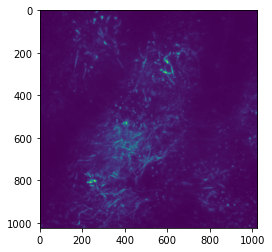

In [23]:
plt.imshow(ii.mean(axis=0))

In [66]:
['1', '2'] == ['2', '1']

False

In [101]:
set(['1', '2', '3']) == set(['2', '3', '1'])

True

In [162]:
'#000001 d8 D1-filter & z scaling X 5.traces'.strip('.traces')

'#000001 d8 D1-filter & z scaling X 5'

In [107]:
import re
def key_function(fname):
    parser = re.compile('(?P<fname>#(?P<unique_idx>(?P<id>\w+) d(?P<day>\d+))[ ]?(?P<description>.*)).?(?P<fname_extension>.+$)?')
    
    print(parser.search(fname).group())
    print(parser.search(fname).group('fname_extension'))
    parsed = parser.search(fname).group('day')
    return int(parsed)

sorted(['#000001 d135 D1-filter & z scaling X 5.tif', '#000001 d0 D1-filter & z scaling X 5', '#000001 d8 D1-filter & z scaling X 5.traces'], key=key_function)

#000001 d135 D1-filter & z scaling X 5.tif
None
#000001 d0 D1-filter & z scaling X 5
None
#000001 d8 D1-filter & z scaling X 5.traces
None


['#000001 d0 D1-filter & z scaling X 5',
 '#000001 d8 D1-filter & z scaling X 5.traces',
 '#000001 d135 D1-filter & z scaling X 5.tif']

In [63]:
for i in range(10):
    if i%2==1:
        continue
    
    if i%2==0:
        print(i)
    
    print('asdf')

0
asdf
2
asdf
4
asdf
6
asdf
8
asdf


In [26]:
def af(*args):
    print(args)

def afaf(**args):
    print(args)

In [28]:
af(*(1, 2, 3))

afaf(**{'1' : 1, '2' : 2, '3' : 3})

(1, 2, 3)
{'1': 1, '2': 2, '3': 3}


In [2]:
from collections import Counter

words = ['a', 'b', 'c', 'a']

Counter(words).keys() # equals to list(set(words))
Counter(words).values() # counts the elements' frequency

dict_values([2, 1, 1])

In [159]:
import re
print(type(re.compile('#(?P<unique_idx>(?P<id>\w+) d(?P<day>\d+))[ ]?(?P<description>.*)[.](?P<fname_extension>.+$)')))
name_parser = re.compile('#(?P<unique_idx>(?P<id>\w+) d(?P<day>\d+))[ ]?(?P<description>.*)\.(?P<fname_extension>.+$)')

<class 're.Pattern'>


In [161]:
print(name_parser.search('#000001 d1   .tif').group('description'))
print(name_parser.search('#000001 d1 D1-filter & z scaling X 5.tif').group())
print(name_parser.search('#000001 d1 D1-filter & z scaling X 5.tif').group('description'))
print(name_parser.search('#000001 d1 D1-filter & z scaling X 5.tif').group('id'))
print(name_parser.search('#000001 d1 D1-filter & z scaling X 5.tif').group('day'))
print(name_parser.search('#000001 d1 D1-filter & z scaling X 5.tif').group('fname_extension'))
print(name_parser.search('#000001 d1 D1-filter & z scaling X 5.tif').group('unique_idx'))

AttributeError: 'NoneType' object has no attribute 'group'